<a href="https://colab.research.google.com/github/AcacioMarcos/mackenzie/blob/paradigmas/Atividade_Aprofundamento_Trilha_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Panorama dos datasets

Para essa atividade realizei o download de tres datasets do site GAPMINDER, sendo eles:


* GINI
* Renda per capita
* Percepção de corrupção

A ideia neste caso é tentar identificar algum tipo de correlação (não irei avaliar se existe efeito causal entre as fontes por ainda não ter o conhecimento técnico necessário para tal) entre esses datasets.

Nesse caso vou utilizar o item "Perceoção de corrupção" para confrontar com os demais datasets no intuíto de localizar algo correlacionado.

Escolhi esses itens pois faz parte de uma outra pesquisa que estou realizando que versa sobre como a percepção de corrupção impacta nos indicadores sociais.

##Explicação sobre os datasets:

* GINI: Indicador mostra a desigualdade de renda na sociedade. Quanto maior o número mais desigual é a sociedade
* Renda per capita: PIB per capita ajustado para as diferenças de poder de compra
* Percepção de corrupção: Pontuação da Transparência Internacional sobre a percepção da corrupção. Quanto maior o valor menor é a corrupção.

## Fonte dos materiais:

Google Colab: https://colab.research.google.com/drive/1BcFqpWOsIrE-LjFLMeXoArNfr5YnSBi0?usp=sharing

Github: https://github.com/AcacioMarcos/mackenzie/blob/paradigmas/Atividade_Aprofundamento_Trilha_4.ipynb

Google Drive: https://drive.google.com/drive/folders/1bsUJLOueSMjrdE_fe-mlwK3QGvh3Bqu0?usp=sharing

In [ ]:
#Carga de arquivos para as variaveis

import pandas as pd

renda = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mackenzie/Paradigmas/Trilha 4/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
gini = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mackenzie/Paradigmas/Trilha 4/gini.csv')
corrupcao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mackenzie/Paradigmas/Trilha 4/corruption_perception_index_cpi_pre2012.csv')

#Preparação dos Dados

Nesse caso irei capturar apenas os dados do Brasil desses datasets, Assim é possível apontar 

In [ ]:
#Filtragem apenas para dados BR

renda_br = renda[renda.country == 'Brazil']
gini_br = gini[gini.country == 'Brazil']
corrupcao_br = corrupcao[corrupcao.country=='Brazil']


,country,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
21,Brazil,2.7,2.96,3.56,4.0,4.1,3.9,4.0,4.0,3.9,3.9,3.7,3.3,3.5,3.5,3.7,3.7,3.77


In [ ]:
#Renomear cabecalho das variaveis

renda_br = pd.melt(renda_br, id_vars=['country'])
renda_br = renda_br.rename(columns={'country':'pais','variable':'ano','value':'renda'})

gini_br = pd.melt(gini_br, id_vars=['country'])
gini_br = gini_br.rename(columns={'country':'pais','variable':'ano','value':'gini'})

corrupcao_br = pd.melt(corrupcao_br, id_vars=['country'])
corrupcao_br = corrupcao_br.rename(columns={'country':'pais','variable':'ano','value':'corrupcao'})



In [ ]:
#Mesclar os datasets

dados_br = pd.merge(renda_br, corrupcao_br, on=['pais','ano'])
dados_br = pd.merge(BR, gini_br, on=['pais','ano'])
dados_br = dados_br.drop_duplicates()

dados_br = dados_br.rename(columns={'corrupcao_x':'corrupcao'})

dados_br.drop(columns=['corrupcao_y'])


,pais,ano,renda,energia,gini,corrupcao
0,Brazil,1994,11.3k,994,59.8,2.70
1,Brazil,1995,11.3k,1030,59.7,2.96
2,Brazil,1996,11.5k,1070,59.6,3.56
3,Brazil,1997,11.4k,1080,59.4,4.00
4,Brazil,1998,11.3k,1080,59.1,4.10
5,Brazil,1999,11.6k,1070,58.8,3.90
6,Brazil,2000,11.6k,1080,58.4,4.00
7,Brazil,2001,11.8k,1090,57.9,4.00
8,Brazil,2002,11.8k,1090,57.4,3.90
9,Brazil,2003,12.3k,1140,56.8,3.90


#Visualização e Análise dos Dados

Neste caso apresento, primeiro separadamente, cada um dos componentes em um gráfico.

In [ ]:
#carga de bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


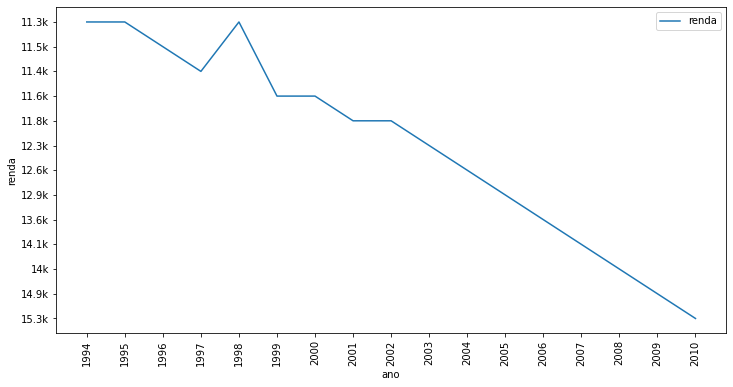

In [ ]:
#montagem grafico de linhas da renda

plt.figure(figsize=(12,6))

sns.lineplot(x=dados_br.ano, y=dados_br.renda, label='renda')

plt.title=('Evolução da Distribuicao de renda no Brasil')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Neste caso se vê que ao longo do tempo a renda per capita do BR está em elevação. Observa-se que o valor em questão está em US$.

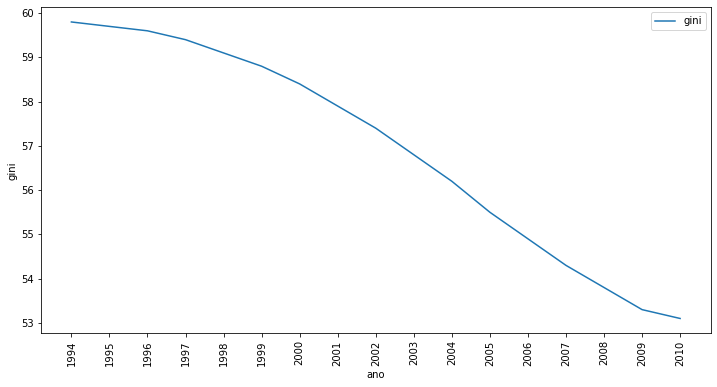

In [ ]:
#montagem grafico de linhas de GINI

plt.figure(figsize=(12,6))

sns.lineplot(x=dados_br.ano, y=dados_br.gini, label='gini')

plt.title=('Evolução do Indicador de GINI no Brasil')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Neste caso se ve que a desigualdade em si está em declinio, alem de continuar se mantendo acima de 50 na ultima medicao

Interessante observar que neste caso também se teve um maior aumento no consumo de energia, quando avaliado o aspecto per capita.



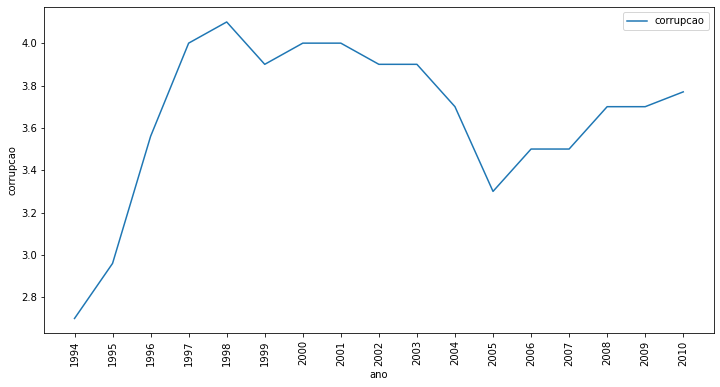

In [ ]:
#montagem grafico de linhas da corrupcao

plt.figure(figsize=(12,6))

sns.lineplot(x=dados_br.ano, y=dados_br.corrupcao, label='corrupcao')

plt.title=('Distribuicao de renda no Brasil')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Legal que nesse gráfico podemos observar que o país estava reduzindo a corrupção entretanto entre 2004/2005 houve um grave declinio nesse indicador. Coincide com o período do escandalo do "Mensalão".

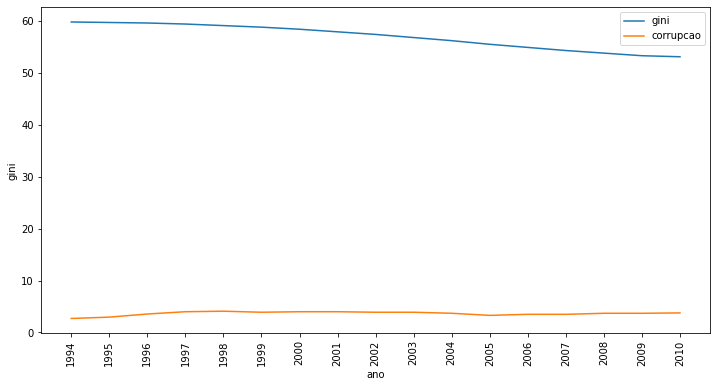

In [ ]:
#montagem grafico de linhas da corrupcao com indicativo de gini

plt.figure(figsize=(12,6))

sns.lineplot(x=dados_br.ano, y=dados_br.gini, label='gini')
sns.lineplot(x=dados_br.ano, y=dados_br.corrupcao, label='corrupcao')

plt.legend()
plt.xticks(rotation=90)
plt.show()

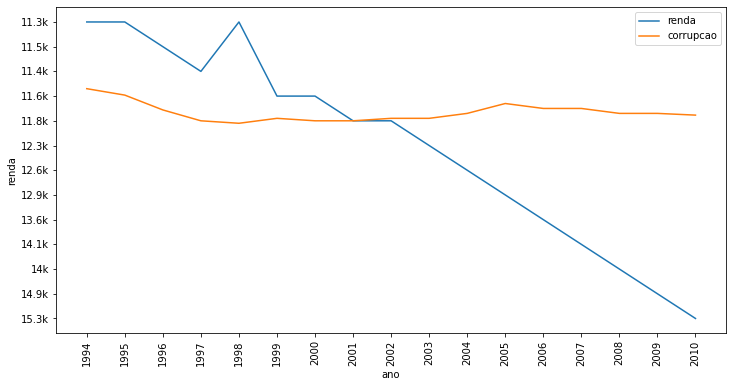

In [ ]:
#montagem grafico de linhas da corrupcao com indicativo de renda

plt.figure(figsize=(12,6))

sns.lineplot(x=dados_br.ano, y=dados_br.renda, label='renda')
sns.lineplot(x=dados_br.ano, y=dados_br.corrupcao, label='corrupcao')

plt.legend()
plt.xticks(rotation=90)
plt.show()

Com essas análises se pode ver que realmente parece que existe uma relação entre o aumento da percepção da corrupção com a melhora no GINI, e por consequencia tambem está correlacionado ao aumento da renda per capita. 